<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis-Projects/blob/main/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [7]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling missing values
import numpy as np

# For date and time operations
import datetime

In [8]:
# Dictionary to store company names and file paths
company_files = {
    'Facebook': '/content/Facebook.csv',
    'Amazon': '/content/Amazon.csv',
    'Apple': '/content/Apple.csv',
    'Netflix': '/content/Netflix.csv',
    'Google': '/content/Google.csv'
}

# List to store DataFrames for each company
company_dataframes = []

# Loop through the dictionary to load each file
for company_name, file_path in company_files.items():
    # Load the CSV file into a DataFrame
    company_data = pd.read_csv(file_path)
    # Add a column indicating the company name
    company_data['Company'] = company_name
    # Append the DataFrame to the list
    company_dataframes.append(company_data)

# Combine all company DataFrames into a single DataFrame
faang_data = pd.concat(company_dataframes, ignore_index=True)

# Preview the combined dataset
print(faang_data.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  


In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {faang_data.shape}")

Dataset shape: (26566, 8)


In [4]:
# View column names
print(f"Columns: {faang_data.columns}")

Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')


In [5]:
# Check for missing values
print(faang_data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64


In [9]:
# Columns to handle missing values
columns_to_fill = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Apply Forward Fill for all specified columns
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')

# Apply Backward Fill to handle any remaining missing values (if any)
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')

# Verify if missing values are handled
print(faang_data[columns_to_fill].isnull().sum())

# Preview the cleaned data
print(faang_data.head())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  


<ipython-input-9-6fb7fa53c662>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')
<ipython-input-9-6fb7fa53c662>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')


## Exploratory Data Analysis (EDA)

In [10]:
# Summary Statistics
print(faang_data.describe())

# Check unique companies
print(faang_data['Company'].unique())


               Open          High           Low         Close     Adj Close  \
count  26566.000000  26566.000000  26566.000000  26566.000000  26566.000000   
mean     190.399567    192.458540    188.199207    190.421641    190.217790   
std      379.614171    383.518301    375.377664    379.668423    379.759250   
min        0.049665      0.049665      0.049107      0.049107      0.038743   
25%        1.658571      1.700000      1.628303      1.656473      1.628571   
50%       33.602501     34.273571     33.075001     33.742142     33.490002   
75%      193.047497    195.295002    190.544159    193.135769    193.135769   
max     3251.060059   3344.290039   3165.429932   3225.000000   3225.000000   

             Volume  
count  2.656600e+04  
mean   1.369662e+08  
std    2.640638e+08  
min    2.856000e+05  
25%    6.040875e+06  
50%    1.855965e+07  
75%    1.614928e+08  
max    7.421641e+09  
['Facebook' 'Amazon' 'Apple' 'Netflix' 'Google']


In [21]:
# Group by 'Company' and calculate the required metrics
volume_stats = (
    faang_data.groupby('Company')
    .agg(
        total_volume=('Volume', 'sum'),
        mean_monthly_volume=('Volume', 'mean'),
        max_monthly_volume=('Volume', 'max'),
        min_monthly_volume=('Volume', 'min')
    )
    .reset_index()
)

# Display the resulting DataFrame
print(volume_stats)

    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         7.512673e+06        1.043292e+08   
1     Apple  3.418317e+12         3.412856e+08        7.421641e+09   
2  Facebook  6.779228e+10         3.265524e+07        5.735764e+08   
3    Google  2.792251e+10         6.909802e+06        8.215110e+07   
4   Netflix  8.064926e+10         1.760516e+07        3.234140e+08   

   min_monthly_volume  
0            487200.0  
1           1388800.0  
2           5913100.0  
3            520600.0  
4            285600.0  


In [31]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10],
    'Mean Monthly Volume': [7.512673e+06, 3.412856e+08, 3.265524e+07, 6.909802e+06, 1.760516e+07],
    'Max Monthly Volume': [1.043292e+08, 7.421641e+09, 5.735764e+08, 8.215110e+07, 3.234140e+08],
    'Min Monthly Volume': [487200.0, 1388800.0, 5913100.0, 520600.0, 285600.0]
})

# Melt the dataframe for easier visualization
volume_stats_melted = volume_stats.melt(id_vars='Company',
                                         value_vars=['Total Volume', 'Mean Monthly Volume', 'Max Monthly Volume', 'Min Monthly Volume'],
                                         var_name='Metric',
                                         value_name='Volume')

# Create the grouped bar chart
fig = px.bar(volume_stats_melted,
             x='Company',
             y='Volume',
             color='Metric',
             barmode='group',  # Group bars together for each company
             title='Comparison of Monthly Trading Volume Metrics for FAANG Companies',
             labels={'Volume': 'Volume', 'Company': 'Company', 'Metric': 'Metrics'},
             category_orders={'Metric': ['Total Volume', 'Mean Monthly Volume', 'Max Monthly Volume', 'Min Monthly Volume']})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="Volume",
    legend_title="Metrics",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for readability
    showlegend=True  # Ensure the legend is displayed
)

# Show the figure
fig.show()

In [36]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10],
    'Mean Monthly Volume': [7.512673e+06, 3.412856e+08, 3.265524e+07, 6.909802e+06, 1.760516e+07],
    'Max Monthly Volume': [1.043292e+08, 7.421641e+09, 5.735764e+08, 8.215110e+07, 3.234140e+08],
    'Min Monthly Volume': [487200.0, 1388800.0, 5913100.0, 520600.0, 285600.0]
})

# Set 'Company' as the index for easy plotting
volume_stats.set_index('Company', inplace=True)

# Create a heatmap using Plotly Express
fig = px.imshow(volume_stats,
                text_auto=True,  # Show the values inside the cells
                color_continuous_scale='Viridis',  # Choose a color scale (you can change this)
                title='Heatmap of Monthly Trading Volume Metrics for FAANG Companies')

# Update layout for better readability
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Company",
    coloraxis_colorbar_title="Volume",  # Title for the color scale
)

# Show the figure
fig.show()

### Summary of Monthly Trading Volume Statistics

This table summarizes the trading volumes for all companies, showing their total volume, mean monthly volume, maximum, and minimum values. Here's a detailed breakdown:

### Insights:

- **Apple Dominates Trading Activity**:
  - With the highest total volume (3.42 trillion) and mean monthly volume (341.29 million), Apple shows strong investor interest and high liquidity in its shares.
  - Apple also recorded the highest maximum monthly volume (7.42 billion), indicating that the company experiences occasional market events that significantly boost trading activity.
  - The large fluctuations between its max (7.42 billion) and min (1.39 million) volumes suggest periods of intense activity and sharp declines.

- **Netflix Shows Significant Volatility**:
  - Netflix has a relatively low mean monthly volume (17.61 million), but its maximum monthly volume (323.41 million) indicates substantial spikes in interest during certain months.
  - This volatility suggests that while Netflix does not consistently trade at high volumes, there are specific periods where investor interest peaks significantly.

- **Amazon’s Consistent Activity**:
  - Amazon has a moderate total volume (43.96 billion), and its mean monthly volume (7.51 million) is comparatively low, indicating more stable trading without sharp spikes.
  - Despite lower trading volume than Apple and Netflix, Amazon still maintains a solid presence in the market, with a max volume of 104.33 million, reflecting healthy investor interest.

- **Google’s Quiet Months**:
  - Google exhibits some of the lowest trading volumes in comparison, with a minimum of just 520,600 shares, which suggests periods of reduced market interest or quieter trading months.
  - Despite this, its maximum monthly volume (82.15 million) indicates that there are occasional spikes in investor interest, although these spikes are not as extreme as Apple or Netflix.

- **Facebook’s Stable but Lower Volume**:
  - Facebook shows a moderate total volume (67.79 billion) and a mean monthly volume (32.66 million), indicating consistent, albeit lower, trading activity compared to Apple.
  - The maximum monthly volume (573.58 million) is notable but still far behind Apple’s trading spike, reflecting steady but less intense market interest.

This summary provides a snapshot of each company's trading dynamics, showing the relative intensity and variability of their trading activity over the dataset period.

In [24]:
import plotly.express as px

# Ensure Date is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Resample to monthly data for each company
faang_monthly = faang_data.groupby('Company').resample('M', on='Date').mean().reset_index()

# Calculate additional statistics for interactivity
stats = faang_monthly.groupby('Company').agg(
    mean_close_price=('Close', 'mean'),
    volatility=('Close', 'std'),
    max_close_price=('Close', 'max')
).reset_index()

# Merge calculated stats back with the monthly data
faang_monthly = faang_monthly.merge(stats, on='Company', how='left')

# Add a 'Year' column for hover information
faang_monthly['Year'] = faang_monthly['Date'].dt.year

# Create an interactive Plotly line chart
fig = px.line(
    faang_monthly,
    x='Date',
    y='Close',
    color='Company',
    title='Monthly Average Stock Close Prices',
    labels={'Close': 'Close Price', 'Date': 'Date'},
    hover_data={
        'Year': True,
        'mean_close_price': ':.2f',
        'volatility': ':.2f',
        'max_close_price': ':.2f'
    }
)

# Customize layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Company',
    hovermode='x unified'
)

# Show the plot
fig.show()

<ipython-input-24-fb3d665b7b1f>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



# **Summary of FAANG Monthly Stock Analysis**

## **Monthly Average Close Prices Summary**
- **Amazon**:
  - Highest mean close price: **381.59**.
  - High volatility: **606.87** standard deviation.
  - Maximum monthly close price: **3154.83** reflects significant growth.

- **Google**:
  - Second-highest mean close price: **537.18**, with moderate volatility (**389.85** std).
  - Maximum close price: **1645.80**, highlighting its dominance.

- **Netflix**:
  - Mean close price: **79.59**, but high volatility (**121.22** std).
  - Maximum value: **499.39**, reflecting growth from global streaming expansion.

- **Facebook**:
  - Mean close price: **117.39**, with relatively stable volatility (**62.43** std).
  - Maximum close price: **259.14**, indicative of growth since its 2012 IPO.

- **Apple**:
  - Lowest average close price: **9.27** (likely influenced by stock splits).
  - Maximum value: **134.18**, showing steady growth compared to peers.


---

## **Sample of Downsampled Data (Amazon)**
- Early data from 1997 shows a steady increase in close prices:
  - May 1997: **1.58**, reaching **5.29** by February 1998.
- Positive monthly returns in most months suggest consistent growth.
- Fluctuating trading volumes indicate varying levels of investor interest.

---

## **Key Insights**
1. **Growth Trends**:
   - Amazon and Google exhibit higher mean close prices, showcasing dominant market positions.
   - Apple’s lower mean price reflects stock splits but consistent growth.

2. **Volatility**:
   - Higher volatility for Amazon, Netflix, and Google indicates significant price swings.
   - Facebook shows stable growth with lower price variability.

3. **Early Growth**:
   - Amazon’s rapid price appreciation since its 1997 IPO highlights its e-commerce transformation.

4. **Investor Interest**:
   - Volume data suggests periods of heightened trading activity linked to major events.

---

## **Actionable Ideas**
- **Event Analysis**: Investigate price trends alongside historical events (e.g., product launches, crises).
- **Comparative Analysis**: Compare stock performance during pivotal periods like the 2008 financial crisis or COVID-19 pandemic.
- **Forecasting**: Leverage this data to build predictive models for stock prices or trading volumes.

---

In [18]:
# Print a summary of the resampled data
print("Monthly Average Close Prices Summary (First Few Rows):")
print(faang_monthly.groupby('Company')['Close'].describe())

# Preview the first few rows of the resampled data
print("\nSample of Downsampled Data:")
print(faang_monthly.head(10))  # Adjust the number of rows as needed

Monthly Average Close Prices Summary (First Few Rows):
          count        mean         std        min         25%         50%  \
Company                                                                      
Amazon    280.0  381.585850  606.866311   1.537699   38.182809   83.301591   
Apple     478.0    9.266662   17.740092   0.057318    0.271876    0.435302   
Facebook  100.0  117.388546   62.432349  20.108261   66.912631  118.253332   
Google    194.0  537.177819  389.853619  52.683795  242.623601  343.284095   
Netflix   220.0   79.590965  121.221228   0.560217    3.750701   15.655714   

                 75%          max  
Company                            
Amazon    363.180858  3154.831982  
Apple      10.505837   134.179993  
Facebook  173.352495   259.140834  
Google    796.341541  1645.797485  
Netflix    99.628361   499.385003  

Sample of Downsampled Data:
  Company       Date      Open      High       Low     Close  Adj Close  \
0  Amazon 1997-05-31  1.686553  1.722538  

In [13]:
# Sort by Date
faang_data.sort_values(by='Date', inplace=True)

# Calculate daily percentage change
faang_data['Daily Return'] = faang_data.groupby('Company')['Close'].pct_change()

# Preview daily returns
print(faang_data[['Date', 'Company', 'Daily Return']].tail())

             Date Company  Daily Return
17943  2020-09-01   Apple      0.039833
26562  2020-09-01  Google      0.015679
26563  2020-09-02  Google      0.037648
26564  2020-09-03  Google     -0.051171
26565  2020-09-04  Google     -0.029641


<ipython-input-17-daf4bb08a577>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  faang_monthly_volume = faang_data.groupby(['Company']).resample('M', on='Date')['Volume'].sum().reset_index()


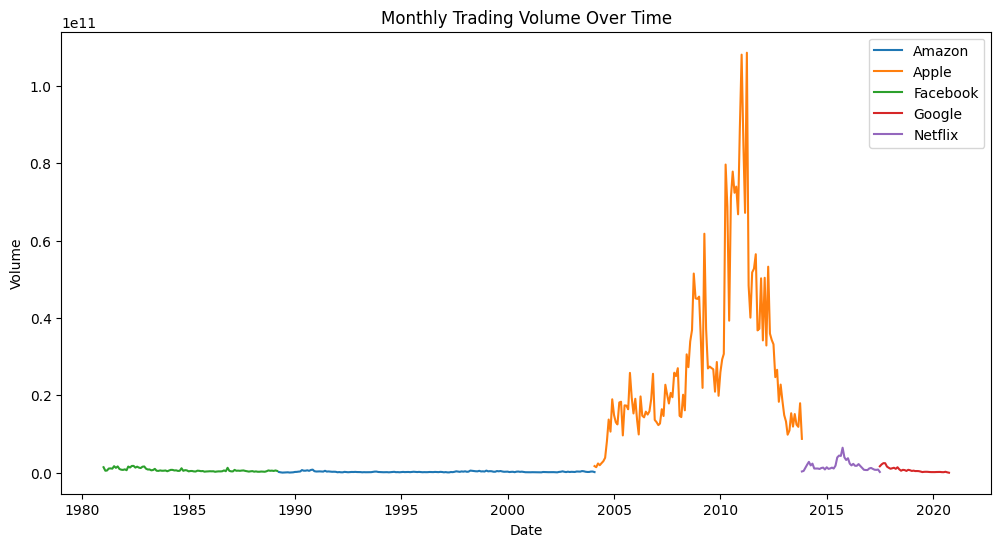

In [17]:
# Ensure Date is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Resample to monthly data for Volume
faang_monthly_volume = faang_data.groupby(['Company']).resample('M', on='Date')['Volume'].sum().reset_index()

# Plot downsampled Volume trends
plt.figure(figsize=(12, 6))

for company in faang_monthly_volume['Company'].unique():
    subset = faang_monthly_volume[faang_monthly_volume['Company'] == company]
    plt.plot(subset['Date'], subset['Volume'], label=company)

plt.title('Monthly Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [20]:
# Summarize monthly trading volume data
volume_summary = faang_monthly_volume.groupby('Company').agg(
    total_volume=('Volume', 'sum'),
    mean_monthly_volume=('Volume', 'mean'),
    max_monthly_volume=('Volume', 'max'),
    min_monthly_volume=('Volume', 'min')
).reset_index()

# Display the first few rows of the downsampled data for context
print("Sample of Monthly Trading Volume Data:")
print(faang_monthly_volume.head())

# Display the summary of trading volume
print("\nSummary of Monthly Trading Volume Statistics:")
print(volume_summary)

Sample of Monthly Trading Volume Data:
  Company       Date       Volume
0  Amazon 1989-03-31  194908800.0
1  Amazon 1989-04-30  105637200.0
2  Amazon 1989-05-31   43791600.0
3  Amazon 1989-06-30   59733600.0
4  Amazon 1989-07-31   86528400.0

Summary of Monthly Trading Volume Statistics:
    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         2.456099e+08        8.114012e+08   
1     Apple  3.418317e+12         2.896879e+10        1.085279e+11   
2  Facebook  6.779228e+10         6.847705e+08        1.774149e+09   
3    Google  2.792251e+10         6.980628e+08        2.484341e+09   
4   Netflix  8.064926e+10         1.792206e+09        6.475908e+09   

   min_monthly_volume  
0        4.379160e+07  
1        1.434966e+09  
2        2.560592e+08  
3        1.090373e+07  
4        2.085346e+08  


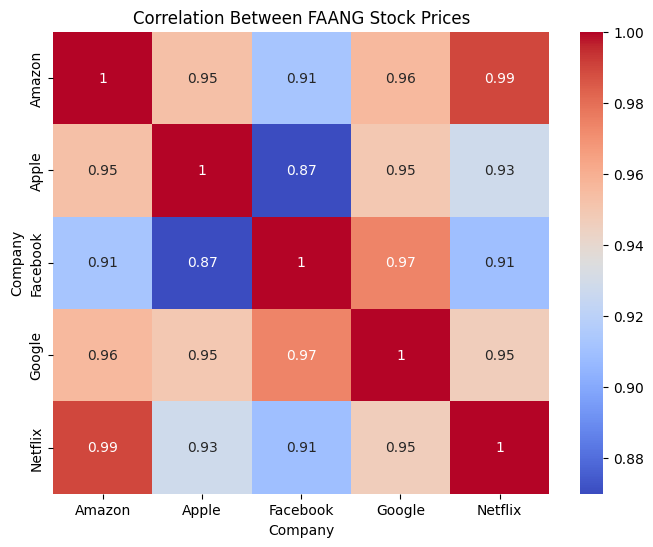

In [15]:
# Pivot dataset to create columns for each company's Close prices
pivot_data = faang_data.pivot(index='Date', columns='Company', values='Close')

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between FAANG Stock Prices')
plt.show()
